Необходимо запустить практическую часть занятия, и посмотреть самому то, о чём говорили на лекции. 

По образу практики, попробуйте создать искусственный датасет с лишними столбцами. Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель.  

Ориентируйтесь на то, что было показано во время занятия, и каждый шаг описывайте в markdown. Здесь важно видеть ваш ход мысли. 

Не бойтесь ошибиться или написать не то. Данное задание не имеет какого-то “правильного” решения. Цель - достичь базового понимания проблемы. Чем больше вы фантазируете, тем лучше :) 

Тем не менее, старайтесь представить те ситуации, которые по-вашему мнению могли бы быть в реальных данных. Успеха!

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

Создаем датасет, который будет содержать информацию по банкам краски:
    - Цена за банку
    - Объем банки в мл
    - площадь в м2, которую может покрыть 100мл данной краски
Для использования нашей краски её необходимо смешивать с 20% воды от объема, а значит исходный объем  нужно умножать на 1,2  
Для расчета общей покрываемой площади одной банки будем сначала умножать объем на 1,2 , затем делить на 100 и умножать на площадь, которую покроет 100мл краски

In [40]:
# Создаем сэмпл
n_samples = 1000

tin_price = np.random.choice(1000, n_samples) + 1000 # Цена за банку
tin_volume  = np.random.choice(40, n_samples)*100 + 500 # Объем банки в мл
coverage_area = np.random.choice(12, n_samples) + 7 # площадь в м2, которую может покрыть 100мл данной краски

# Считаем общий покрываемый объем банки
total_area = tin_volume*1.2/100*coverage_area

data = pd.DataFrame({'Цена за банку': tin_price, 'Объем банки в мл': tin_volume,
                     'площадь в м2 (на 100 мл)': coverage_area, 'Площадь покрытия, м2': total_area})

data.head()

,Цена за банку,Объем банки в мл,площадь в м2 (на 100 мл),"Площадь покрытия, м2"
0,1389,3400,17,693.6
1,1147,3600,18,777.6
2,1133,500,15,90.0
3,1483,1900,16,364.8
4,1404,700,17,142.8


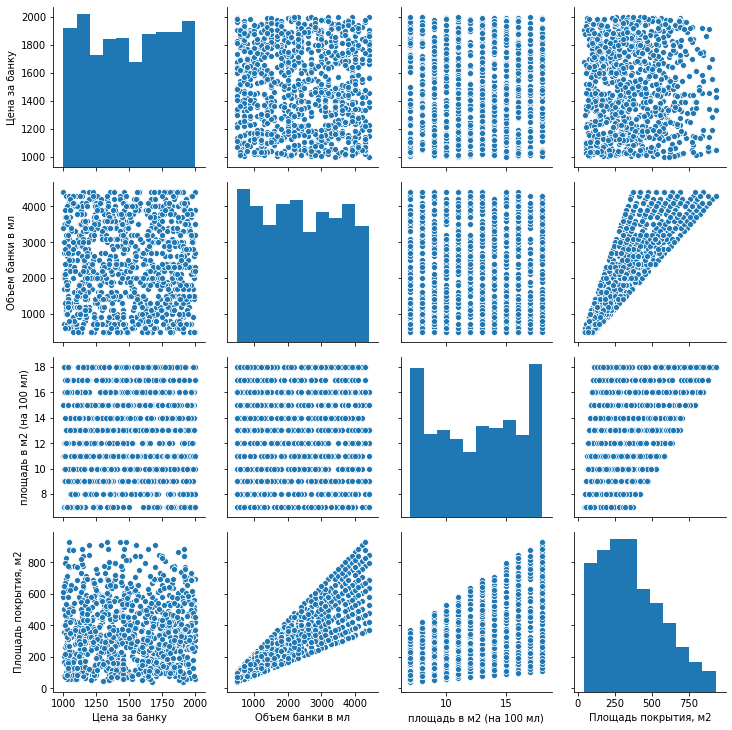

In [41]:
sns.pairplot(data)

Обучим модель линейной регрессии

In [42]:
from sklearn.metrics import mean_absolute_error

# Определяем параметры
X = data[['Цена за банку', 'Объем банки в мл', 'площадь в м2 (на 100 мл)']]

# Определяем целевое значение
y = data['Площадь покрытия, м2']

# Обучаем модель
reg = LinearRegression().fit(X, y)

# Определяем веса (наши 20% воды):
print('Weights: {}'.format(reg.coef_))

# Определяем сдвиг
print('Bias: {}'.format(reg.intercept_))

# С помощью обученной модели и имеющихся параметров Х предсказываем целевые значения у
pred_values = reg.predict(X)

# Считаем абсолютную ошибку
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.18399524e-02  1.50217466e-01  2.90883676e+01]
Bias: -346.3354266575155
Error: 36.62870904074272


In [43]:
y.median()

327.59999999999997

Наблюдаем ошибку, которую необходимо устранить. Первым делом определим, влияет ли на площадь покрытия цена изделия?

In [44]:
X = data[['Объем банки в мл', 'площадь в м2 (на 100 мл)']]
y = data['Площадь покрытия, м2']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['Объем банки в мл', 'площадь в м2 (на 100 мл)']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ 0.15022954 29.08769265]
Bias: -364.1315295048668
Error: 36.57357678754067


Видим, что это не дало нам каких-то сильных изменений, а значит цена никак не влияет на общую площадь покрытия

In [45]:
# Создаем новый признак
data['coverage'] = data['Объем банки в мл']/100 * data['площадь в м2 (на 100 мл)']
data.head(5)

,Цена за банку,Объем банки в мл,площадь в м2 (на 100 мл),"Площадь покрытия, м2",coverage
0,1389,3400,17,693.6,578.0
1,1147,3600,18,777.6,648.0
2,1133,500,15,90.0,75.0
3,1483,1900,16,364.8,304.0
4,1404,700,17,142.8,119.0


Построим модель по новому созданному признаку

In [46]:
X = data[['coverage']]
y = data['Площадь покрытия, м2']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['coverage']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [1.2]
Bias: 3.410605131648481e-13
Error: 1.6334666952388944e-13


Получили верный вес в 20%, которые добавлялись за счет воды, сдвиг и ошибка нулевые